In [1]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [2]:
# Load the trained model 
model = torch.load('./CFExp/weights.pt')
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [3]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('./CFExp/log.csv')

### Training and testing loss, f1_score and auroc values for the model trained on the dataset

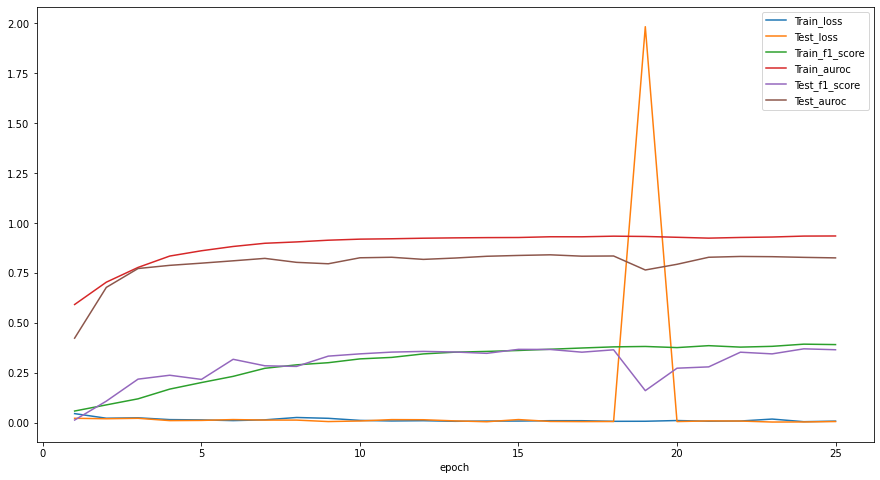

In [4]:
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(15,8));

In [5]:
print(df[['Train_auroc','Test_auroc']].max())

Train_auroc    0.936169
Test_auroc     0.841937
dtype: float64


### Sample Prediction

In [6]:
ino = 2
# Read  a sample image and mask from the data-set
img = cv2.imread(f'./LaneData/Images/{ino:03d}.jpg').transpose(2,0,1).reshape(1,3,320,480)
mask = cv2.imread(f'./LaneData/Masks/{ino:03d}_label.PNG')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

(array([2.64900e+03, 1.31774e+05, 6.76700e+03, 4.42500e+03, 3.60900e+03,
        2.36500e+03, 1.32800e+03, 6.20000e+02, 4.80000e+01, 1.50000e+01]),
 array([-0.2715176 , -0.11536801,  0.04078159,  0.1969312 ,  0.35308078,
         0.5092304 ,  0.66538   ,  0.82152957,  0.9776792 ,  1.1338288 ,
         1.2899784 ], dtype=float32),
 <BarContainer object of 10 artists>)

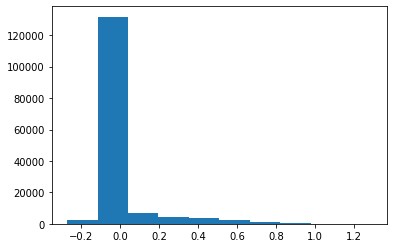

In [7]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())